In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
import os
print("Current dir ",os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"dataset","Train")

test_path=os.path.join(curr_dir,"dataset","Test")

valid_path=os.path.join(curr_dir,"dataset","Valid")


Current dir  c:\Users\Mrigangana Sarkar\Desktop\POTATO DISEASE DETECTION


In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",

)

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",

)

Found 300 files belonging to 3 classes.


In [15]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


#cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,3,3]))
#cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[128,3,3]))
#cnn.add(tf.keras.layers.MaxPool2D(pool_ize=2,strides=2))


#cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,3,3]))
#cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu',input_shape=[128,3,3]))
#cnn.add(tf.keras.layers.MaxPool2D(pool_ize=2,strides=2))


#cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,3,3]))
#cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu',input_shape=[128,3,3]))
#cnn.add(tf.keras.layers.MaxPool2D(pool_ize=2,strides=2))


#cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,3,3]))
#cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu',input_shape=[128,3,3]))
#cnn.add(tf.keras.layers.MaxPool2D(pool_ize=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']
)

In [17]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │   190,513,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,528,147 (726.81 MB)

 Trainable params: 190,528,147 (726.81 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.3440 - loss: 838.7095 - val_accuracy: 0.7100 - val_loss: 9.4126
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5642 - loss: 45.1958 - val_accuracy: 0.8233 - val_loss: 5.2032
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.7549 - loss: 12.3127 - val_accuracy: 0.7700 - val_loss: 4.8575
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.8151 - loss: 3.5988 - val_accuracy: 0.8300 - val_loss: 2.1936
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7859 - loss: 2.2680 - val_accuracy: 0.6533 - val_loss: 2.0186
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.8164 - loss: 1.0664 - val_accuracy: 0.8467 - val_loss: 0.5443
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.8195 - loss: 0.6483 - val_accuracy: 0.8700 - val_loss: 0.3809
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.8738 - loss: 0.3450 - val_accuracy: 0.8867 - 

In [19]:
train_loss,train_acc=cnn.evaluate(training_set)
print("training_accuracy:",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9625 - loss: 0.1179
training_accuracy: 0.9622222185134888


In [20]:
val_loss,val_acc=cnn.evaluate(validation_set)
print("Validation accuracy:",val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.8820 - loss: 0.2774
Validation accuracy: 0.8866666555404663


In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history

{'accuracy': [0.3799999952316284,
  0.601111114025116,
  0.7677778005599976,
  0.8144444227218628,
  0.8055555820465088,
  0.8488888740539551,
  0.8333333134651184,
  0.8811110854148865,
  0.8544444441795349,
  0.8733333349227905],
 'loss': [454.687744140625,
  37.27192306518555,
  9.39456844329834,
  3.276017904281616,
  1.6933200359344482,
  0.7527638673782349,
  0.5883277058601379,
  0.3294980823993683,
  0.3446199893951416,
  0.3237491250038147],
 'val_accuracy': [0.7099999785423279,
  0.8233333230018616,
  0.7699999809265137,
  0.8299999833106995,
  0.653333306312561,
  0.846666693687439,
  0.8700000047683716,
  0.8866666555404663,
  0.8500000238418579,
  0.8866666555404663],
 'val_loss': [9.412643432617188,
  5.203210353851318,
  4.857546329498291,
  2.193586826324463,
  2.018594264984131,
  0.5442561507225037,
  0.380893737077713,
  0.3435545563697815,
  0.3180355429649353,
  0.2940213084220886]}

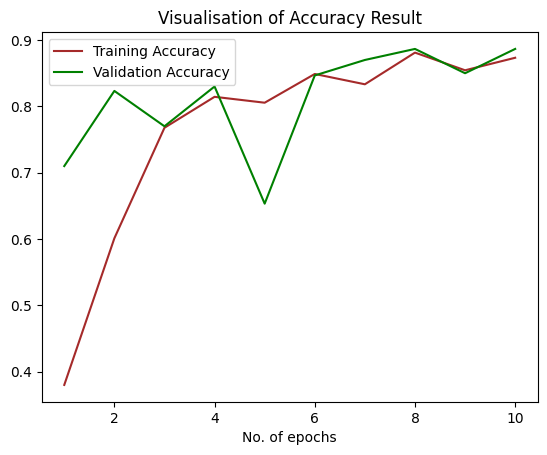

In [23]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of epochs')
plt.title('Visualisation of Accuracy Result')
plt.legend()
plt.show()